<a href="https://colab.research.google.com/github/LorenzoDonatti/TCC_MachineLearning_VLC/blob/main/Final_OOK_40_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORITMOS DE DEEP LEARNING EM DATASETS DE COMUNICAÇÃO POR LUZ VISIVEL**

---


TRABALHO DE CONCLUSÃO DE CURSO DO ALUNO LORENZO MOREIRA DONATTI.

# Importação de Bibliotecas e Download da Pasta no Drive

---
Como o dataset foi baixado no GDrive, é possível baixar a pasta completa pela biblioteca gdown.
Ela ainda fornece como saída, os diretórios de todos arquivos baixados (guardar em variavel)


In [ ]:
!pip install -U --no-cache-dir gdown --pre

#MANIPULAÇÃO
import numpy as np
import pandas as pd

#DOWNLOAD E ABERTURA
import gdown
from scipy.io import loadmat

#FILTRO
from scipy.ndimage import gaussian_filter1d

#PRE PROCESSAMENTO E METRICAS
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#MODELOS DE MACHINE LEARNING
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#VISUALIZAÇÃO
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
teste = "https://drive.google.com/drive/folders/1TkvBRg2PaKI1KFCpT_7xon6COiWL2ZqX?usp=sharing"
output = gdown.download_folder(teste, quiet=True, use_cookies=False,)

output

['/content/40/0cm.mat',
 '/content/40/5cm.mat',
 '/content/40/10cm.mat',
 '/content/40/15cm.mat',
 '/content/40/20cm.mat',
 '/content/40/25cm.mat',
 '/content/40/30cm.mat',
 '/content/40/35cm.mat',
 '/content/40/40cm.mat',
 '/content/40/45cm.mat',
 '/content/40/50cm.mat',
 '/content/40/55cm.mat',
 '/content/40/60cm.mat',
 '/content/40/65cm.mat',
 '/content/40/70cm.mat',
 '/content/40/75cm.mat',
 '/content/40/80cm.mat',
 '/content/40/85cm.mat',
 '/content/40/90cm.mat',
 '/content/40/95cm.mat',
 '/content/40/100cm.mat',
 '/content/40/105cm.mat',
 '/content/40/110cm.mat',
 '/content/40/115cm.mat',
 '/content/40/120cm.mat',
 '/content/40/125cm.mat',
 '/content/40/130cm.mat',
 '/content/40/135cm.mat',
 '/content/40/140cm.mat',
 '/content/40/145cm.mat',
 '/content/40/150cm.mat',
 '/content/40/155cm.mat',
 '/content/40/160cm.mat',
 '/content/40/165cm.mat',
 '/content/40/170cm.mat',
 '/content/40/175cm.mat',
 '/content/40/180cm.mat',
 '/content/40/label.mat']

# Abrindo arquivos .mat e identificando seu cabeçalho

---



Para a abertura de arquivos .mat foi necessário o módulo loadmat da biblioteca scipy.io. A função retorna um dicionário com diferentes Headers, onde apenas o ultimo será utilizado. 

Como todos arquivos da pasta serão abertos, o conteúdo de cada arquivo será guardado em uma posição de uma lista.

Os labels (saida y) estarão na ultima posição da lista 

In [ ]:
########### ESSE PROCESSO É SUBSTITUIDO###########
exemplo = loadmat('/content/40/label.mat')
print(exemplo)

exemplo = exemplo['org_label']
print(exemplo)

########### POR ESSE PROCESSO ################
exemplo_otim = loadmat('/content/40/label.mat')
exemplo_otim = exemplo_otim[list(exemplo_otim.keys())[-1]]
print(exemplo_otim)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Jul 24 21:18:44 2018', '__version__': '1.0', '__globals__': [], 'org_label': array([[1, 0, 1, ..., 1, 1, 1]], dtype=uint8)}
[[1 0 1 ... 1 1 1]]
[[1 0 1 ... 1 1 1]]


In [ ]:
datas = []

for o in output:
  data_test = loadmat(o)
  data_test = data_test[list(data_test.keys())[-1]]
  datas.append(data_test)

print(datas[-1], datas[0])

[[1 0 1 ... 1 1 1]] [[0.51724138 0.55172414 0.48275862 ... 0.51724138 0.55172414 0.55172414]
 [0.51724138 0.62068966 0.48275862 ... 0.5862069  0.55172414 0.5862069 ]
 [0.55172414 0.65517241 0.44827586 ... 0.65517241 0.62068966 0.65517241]
 ...
 [0.37931034 0.48275862 0.37931034 ... 0.37931034 0.31034483 0.34482759]
 [0.4137931  0.48275862 0.44827586 ... 0.37931034 0.37931034 0.4137931 ]
 [0.48275862 0.44827586 0.44827586 ... 0.48275862 0.44827586 0.44827586]]


# Preparação dos dados e Codificação dos valores Numéricos

---
É necessário codificar os dados em duas situações, quando forem categóricos (não numéricos) e quando estiverem com valores numéricos diferentes do escopo entre 0 e 1, a biblioteca sklearn fornece duas funções de fácil utilização e bem otimizadas.

Basicamente é feito um casting para int e após uma normalização dos dados.

Além disso, os dados do dataset vêm com o shape (1,x), e nosso modelo de machine learning somente aceitará vetores como parâmetro de saída, sendo necessário Transpor nossa estrutura.

Também, a função flatten é necessária para transformar a estrutura em um vetor de 1D.



In [ ]:
print("Formatos originais dos dados: \n", datas[-1].shape, datas[0].shape, type(datas[-1]))

print("\nFormatos Transpostos dos dados: \n", datas[-1].T.shape, datas[0].T.shape)

print("\nUtilização do flatten: \n", datas[-1].flatten().shape)

print("\nDados sem flatten: \n", datas[-1].T, "\nDados com flatten: \n", datas[-1].flatten())

Formatos originais dos dados: 
 (1, 18000) (40, 18000) <class 'numpy.ndarray'>

Formatos Transpostos dos dados: 
 (18000, 1) (18000, 40)

Utilização do flatten: 
 (18000,)

Dados sem flatten: 
 [[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]] 
Dados com flatten: 
 [1 0 1 ... 1 1 1]


In [ ]:
lab = preprocessing.LabelEncoder()
y_transf = lab.fit_transform(datas[-1].flatten())

print(y_transf.shape)

(18000,)


# Modelo de Machine Learning (SVM)

---

As máquinas de vetores de suporte foram obtidas através da biblioteca scikitlearn, com o seguinte procedimento:

Como os valores que serão utilizados estão dentro de uma lista, foi necessário um laço de repetição, que percorrerá do inicio até o penultimo valor (ignorando o label, pois será a saída)

O primeiro passo é separar os dados de treino e os dados de teste, seria necessária a normalização, porém os dados do dataset já estão normalizados.

Os Parametros são

In [ ]:
'''i=0
distancia = []
acur_SVM = []
acur_SVM_Gauss = []
for data in datas[:-1]:
  X_train, X_test, y_train, y_test  = train_test_split(data.T, y_transf, test_size=0.33, random_state=0)

  X_train_Gauss = gaussian_filter1d(X_train, 3)
  X_test_Gauss = gaussian_filter1d(X_test, 3)

  clf = SVC(kernel = 'linear', decision_function_shape='ovo')
  clf.fit(X_train, y_train)

  clf_Gauss = SVC(kernel = 'linear', decision_function_shape='ovo')
  clf_Gauss.fit(X_train_Gauss, y_train)

  y_pred = clf.predict(X_test)
  y_pred_Gauss = clf_Gauss.predict(X_test_Gauss)

  acur_SVM.append(accuracy_score(y_test, y_pred)*100)
  acur_SVM_Gauss.append(accuracy_score(y_test, y_pred_Gauss)*100)
  distancia.append(i)
  #print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%   Distancia:", i)
  i = i + 5

import matplotlib.pyplot as plt
plt.plot(distancia,acur_SVM) 
plt.plot(distancia,acur_SVM_Gauss,'.') '''  

'i=0\ndistancia = []\nacur_SVM = []\nacur_SVM_Gauss = []\nfor data in datas[:-1]:\n  X_train, X_test, y_train, y_test  = train_test_split(data.T, y_transf, test_size=0.33, random_state=0)\n\n  X_train_Gauss = gaussian_filter1d(X_train, 3)\n  X_test_Gauss = gaussian_filter1d(X_test, 3)\n\n  clf = SVC(kernel = \'linear\', decision_function_shape=\'ovo\')\n  clf.fit(X_train, y_train)\n\n  clf_Gauss = SVC(kernel = \'linear\', decision_function_shape=\'ovo\')\n  clf_Gauss.fit(X_train_Gauss, y_train)\n\n  y_pred = clf.predict(X_test)\n  y_pred_Gauss = clf_Gauss.predict(X_test_Gauss)\n\n  acur_SVM.append(accuracy_score(y_test, y_pred)*100)\n  acur_SVM_Gauss.append(accuracy_score(y_test, y_pred_Gauss)*100)\n  distancia.append(i)\n  #print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%   Distancia:", i)\n  i = i + 5\n\nimport matplotlib.pyplot as plt\nplt.plot(distancia,acur_SVM) \nplt.plot(distancia,acur_SVM_Gauss,\'.\') '

# **ÁRVORES DE DECISÃO**

---






In [ ]:
i=0
distancia = []
acur_DT = []
acur_DT_Gauss = []
for data in datas[:-1]:
  X_train, X_test, y_train, y_test  = train_test_split(data.T, y_transf, test_size=0.33, random_state=0)
  
  X_train_Gauss = gaussian_filter1d(X_train, 3)
  X_test_Gauss = gaussian_filter1d(X_test, 3)

  clf = DecisionTreeClassifier(criterion='entropy')
  clf.fit(X_train, y_train)

  clf_Gauss = DecisionTreeClassifier(criterion='entropy')
  clf_Gauss.fit(X_train_Gauss, y_train)

  y_pred = clf.predict(X_test)
  y_pred_Gauss = clf_Gauss.predict(X_test_Gauss)

  acur_DT.append(accuracy_score(y_test, y_pred)*100)
  acur_DT_Gauss.append(accuracy_score(y_test, y_pred_Gauss)*100)
  distancia.append(i)
  #print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%   Distancia:", i)
  i = i + 5

#plt.plot(distancia,acur_DT) 
#plt.plot(distancia,acur_DT_Gauss,'.') 

# **METODOS DE ENSEMBLE**

---



> # **Florestas Aleatórias**

---

> Quando o Bagging é utilizado em Decision Trees (Arvores de Decisão), um novo algoritmo chamado Random Forest é criado.



> A biblioteca Scikit Learn conta com um modulo dedicado apenas as Random Forests.


In [ ]:
i=0
distancia = []
acur_RF = []
acur_RF_Gauss = []
for data in datas[:-1]:
  X_train, X_test, y_train, y_test  = train_test_split(data.T, y_transf, test_size=0.33, random_state=0)
  
  X_train_Gauss = gaussian_filter1d(X_train, 3)
  X_test_Gauss = gaussian_filter1d(X_test, 3)

  clf = RandomForestClassifier(criterion='entropy',n_estimators=25)
  clf.fit(X_train, y_train)

  clf_Gauss = RandomForestClassifier(criterion='entropy',n_estimators=25)
  clf_Gauss.fit(X_train_Gauss, y_train)

  y_pred = clf.predict(X_test)
  y_pred_Gauss = clf_Gauss.predict(X_test_Gauss)

  acur_RF.append(accuracy_score(y_test, y_pred)*100)
  acur_RF_Gauss.append(accuracy_score(y_test, y_pred_Gauss)*100)
  distancia.append(i)
  #print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%   Distancia:", i)
  i = i + 5

#plt.plot(distancia,acur_RF) 
#plt.plot(distancia,acur_RF_Gauss,'.')  

# **BOOSTING**

---

Metodos de Boosting são metodos de ensemble que combinam classificadores fracos sequencialmente. Cada classificador tem objetivo de corrigir os erros do predecessor.

Serão abordados o Adaboost e o Gradient Boost.


> # **Gradient Boost**




In [ ]:
i=0
distancia = []
acur_GB = []
acur_GB_Gauss = []
for data in datas[:-1]:
  X_train, X_test, y_train, y_test  = train_test_split(data.T, y_transf, test_size=0.33, random_state=0)
  
  X_train_Gauss = gaussian_filter1d(X_train, 3)
  X_test_Gauss = gaussian_filter1d(X_test, 3)

  clf = GradientBoostingClassifier(n_estimators=25)
  clf.fit(X_train, y_train)

  clf_Gauss = GradientBoostingClassifier(n_estimators=25)
  clf_Gauss.fit(X_train_Gauss, y_train)

  y_pred = clf.predict(X_test)
  y_pred_Gauss = clf_Gauss.predict(X_test_Gauss)

  acur_GB.append(accuracy_score(y_test, y_pred)*100)
  acur_GB_Gauss.append(accuracy_score(y_test, y_pred_Gauss)*100)
  distancia.append(i)
  #print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%   Distancia:", i)
  i = i + 5

#plt.plot(distancia,acur_GB) 
#plt.plot(distancia,acur_GB_Gauss,'.')   

> # **AdaBoost**

In [ ]:
i=0
distancia = []
acur_Ada = []
acur_Ada_Gauss = []
for data in datas[:-1]:
  X_train, X_test, y_train, y_test  = train_test_split(data.T, y_transf, test_size=0.33, random_state=0)
  
  X_train_Gauss = gaussian_filter1d(X_train, 3)
  X_test_Gauss = gaussian_filter1d(X_test, 3)

  clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy'),n_estimators=25)
  clf.fit(X_train, y_train)

  clf_Gauss = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy'), n_estimators=25)
  clf_Gauss.fit(X_train_Gauss, y_train)

  y_pred = clf.predict(X_test)
  y_pred_Gauss = clf_Gauss.predict(X_test_Gauss)

  acur_Ada.append(accuracy_score(y_test, y_pred)*100)
  acur_Ada_Gauss.append(accuracy_score(y_test, y_pred_Gauss)*100)
  distancia.append(i)
  #print("\nAcuracia:", accuracy_score(y_test, y_pred)*100, "%   Distancia:", i)
  i = i + 5

#plt.plot(distancia,acur_Ada) 
#plt.plot(distancia,acur_Ada_Gauss,'.')   

# **PLOT DOS GRAFICOS**

---



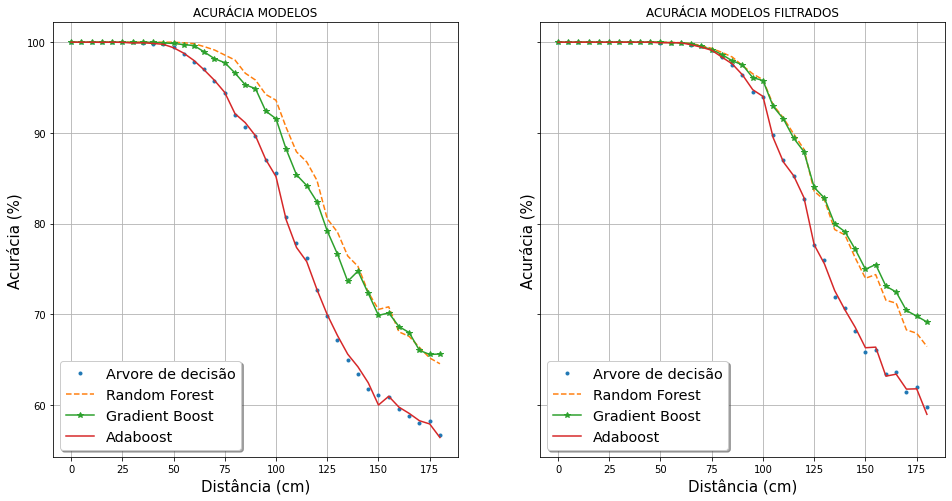

In [ ]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2, figsize=[16,8], sharey=True)
  
axis[0].plot(distancia,acur_DT, '.', label='Arvore de decisão')
axis[0].plot(distancia,acur_RF, '--', label='Random Forest')
axis[0].plot(distancia,acur_GB, '*-', label='Gradient Boost')
axis[0].plot(distancia,acur_Ada, label='Adaboost')
axis[0].set_title("ACURÁCIA MODELOS")
axis[0].legend(shadow=True, fontsize='x-large')
axis[0].grid(True) 
axis[0].set_xlabel('Distância (cm)', fontsize =15)
axis[0].set_ylabel('Acurácia (%)', fontsize =15)

axis[1].plot(distancia,acur_DT_Gauss,'.', label='Arvore de decisão') 
axis[1].plot(distancia,acur_RF_Gauss,'--', label='Random Forest') 
axis[1].plot(distancia,acur_GB_Gauss,'*-', label='Gradient Boost')
axis[1].plot(distancia,acur_Ada_Gauss, label='Adaboost') 
axis[1].set_title("ACURÁCIA MODELOS FILTRADOS")
axis[1].legend(shadow=True, fontsize='x-large')    
axis[1].grid(True) 
axis[1].set_xlabel('Distância (cm)', fontsize =15)
axis[1].set_ylabel('Acurácia (%)', fontsize =15)
plt.show() 

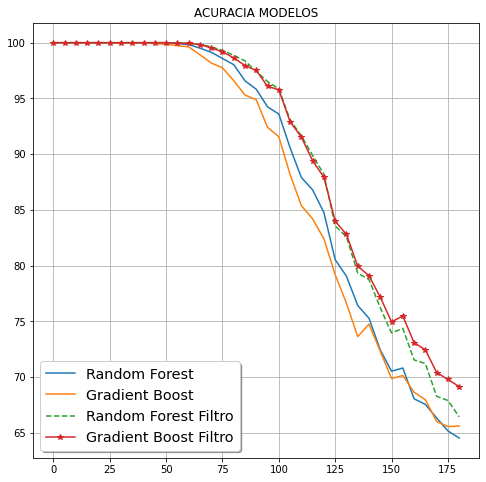

In [ ]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 1, figsize=[8,8])
  
# For Sine Function
axis.plot(distancia,acur_RF, label='Random Forest')
axis.plot(distancia,acur_GB, label='Gradient Boost')
axis.plot(distancia,acur_RF_Gauss,'--', label='Random Forest Filtro') 
axis.plot(distancia,acur_GB_Gauss,'*-', label='Gradient Boost Filtro')
axis.set_title("ACURACIA MODELOS")
axis.legend(shadow=True, fontsize='x-large')
axis.grid(True)   
# Combine all the operations and display
plt.show() 

In [ ]:
for i in range(len(distancia)):
  if distancia[i]==100:
    print(acur_RF[i], acur_RF_Gauss[i])
    print(acur_GB[i], acur_GB_Gauss[i])
    print(acur_Ada[i], acur_Ada_Gauss[i])
    print(acur_DT[i], acur_DT_Gauss[i])

93.60269360269359 95.85858585858585
91.56565656565657 95.77441077441078
85.18518518518519 94.02356902356902
85.55555555555556 93.92255892255892


In [ ]:
for i in range(len(distancia)):
  if distancia[i]==70:
    print(acur_RF[i] - acur_RF_Gauss[i])
    print(acur_GB[i] - acur_GB_Gauss[i])
    print("----------------")
  if distancia[i]==100:
    print(acur_RF[i] - acur_RF_Gauss[i])
    print(acur_GB[i] - acur_GB_Gauss[i])
    print("----------------")
  if distancia[i]==150:
    print(acur_RF[i] - acur_RF_Gauss[i])
    print(acur_GB[i] - acur_GB_Gauss[i])  
    print("----------------")
  if distancia[i]==180:
    print(acur_RF[i] - acur_RF_Gauss[i])
    print(acur_GB[i] - acur_GB_Gauss[i])  

-0.4882154882154879
-1.3468013468013424
----------------
-2.255892255892263
-4.208754208754215
----------------
-3.4343434343434325
-5.084175084175087
----------------
-1.9023569023568996
-3.5353535353535364


In [ ]:
for i in range(len(distancia)):
  if distancia[i]==50:
    print(acur_RF[i],acur_RF_Gauss[i])
    print(acur_GB[i],acur_GB_Gauss[i])
    print("----------------")
  if distancia[i]==100:
    print(acur_RF[i],acur_RF_Gauss[i])
    print(acur_GB[i],acur_GB_Gauss[i])
    print("----------------")
  if distancia[i]==150:
    print(acur_RF[i],acur_RF_Gauss[i])
    print(acur_GB[i],acur_GB_Gauss[i])  
    print("----------------")
  if distancia[i]==180:
    print(acur_RF[i],acur_RF_Gauss[i])
    print(acur_GB[i],acur_GB_Gauss[i])  

100.0 100.0
99.86531986531986 100.0
----------------
93.60269360269359 95.85858585858585
91.56565656565657 95.77441077441078
----------------
70.53872053872054 73.97306397306397
69.88215488215488 74.96632996632997
----------------
64.54545454545455 66.44781144781145
65.62289562289563 69.15824915824916
